In [1]:
from pathlib import Path
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from pprint import pprint
import json
from citipy import citipy
import folium
from folium import plugins
import warnings
warnings.filterwarnings("ignore")

In [2]:
 matchodds_data=Path('/Users/pedrosiqueira/Desktop/python-betfair/output/matchodds_data.csv')
matchodds_df = pd.read_csv(matchodds_data)
matchodds_df

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Tennis,115288925,4/9/14 11:50,Group A/Brasov Challenger 2014/Second Round Ma...,4/9/14 10:30,Match Odds,4/9/14 10:34,7659748,Aslan Karatsev,1.12,...,1,IP,4297.1040,0.000,Romania,Brasov,45.652510,25.610565,22.1,0
1,Soccer,115321908,6/9/14 13:00,Hungarian Soccer/Hungarian U21 League/Fixtures...,6/9/14 11:00,Match Odds,6/9/14 11:19,7598688,Vasas Budapest SC U21,1.15,...,1,IP,34.9830,0.000,Hungary,Budapest,47.497892,19.040161,24.9,0
2,Soccer,115318349,6/9/14 19:52,Brazilian Soccer/Serie C/Fixtures 06 September...,6/9/14 18:00,Match Odds,6/9/14 18:00,58805,The Draw,1.17,...,1,IP,234.0234,0.000,Brazil,Rio de Janeiro,-22.911014,-43.209373,25.3,0
3,Soccer,115250939,1/9/14 19:54,Estonian Soccer/Estonian II Liga/Fixtures 01 S...,1/9/14 18:00,Match Odds,1/9/14 18:02,58805,The Draw,1.47,...,1,IP,108.0744,0.000,Estonia,Tallinn,59.437216,24.745369,12.2,0
4,Tennis,115360639,7/9/14 17:52,Group A/Coupe Banque Nationale 2014/Qualifying...,7/9/14 16:05,Match Odds,7/9/14 16:09,4030151,Heidi El Tabakh,1.70,...,0,IP,0.0000,3511.826,Canada,Quebec City,46.813743,-71.208406,18.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57313,Cricket,114835803,2/9/14 14:48,Group C/Zimbabwe Triangular Series 2014/Fixtur...,2/9/14 7:30,Match Odds,2/9/14 7:30,16606,Australia,1.41,...,1,IP,51652.1211,0.000,Zimbabwe,Harare,-17.831773,31.045686,20.0,0
57314,Soccer,115290411,6/9/14 19:52,Spanish Soccer/Tercera Division/Fixtures 06 Se...,6/9/14 18:00,Match Odds,6/9/14 18:00,8746426,FC Santfeliuenc,1.11,...,1,IP,3797.1546,0.000,Spain,Madrid,40.416705,-3.703582,25.5,0
57315,Soccer,115292381,5/9/14 13:57,U19 Internationals/AFF U19 Championship/Fixtur...,5/9/14 12:00,Match Odds,5/9/14 12:03,6639217,Vietnam U19,4.10,...,1,PE,15.0060,0.000,Vietnam,Hanoi,21.028321,105.854022,27.3,0
57316,Tennis,115314614,5/9/14 16:25,Group A/Genova Challenger 2014/Quarter Final M...,5/9/14 13:44,Match Odds,5/9/14 13:49,4448756,Jason Kubler,2.88,...,0,IP,0.0000,207.072,Italy,Genoa,44.407260,8.933862,26.0,1


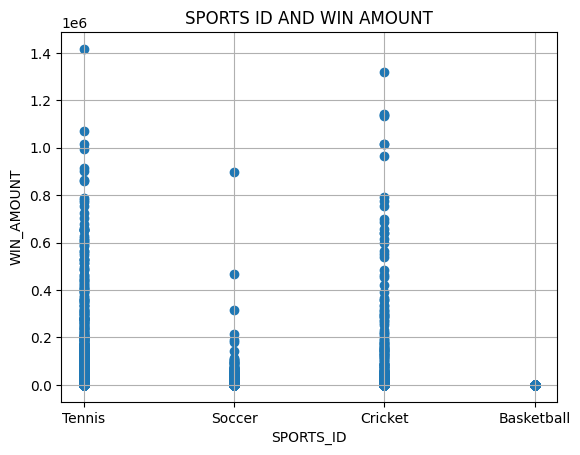

In [3]:
#   PLOT 1 SPORTS ID AND WIN AMOUNT
plt.scatter(matchodds_df["SPORTS_ID"], matchodds_df["WIN_AMOUNT"])
plt.xlabel('SPORTS_ID')
plt.ylabel('WIN_AMOUNT')
plt.grid(True)
plt.title('SPORTS ID AND WIN AMOUNT')
plt.show()

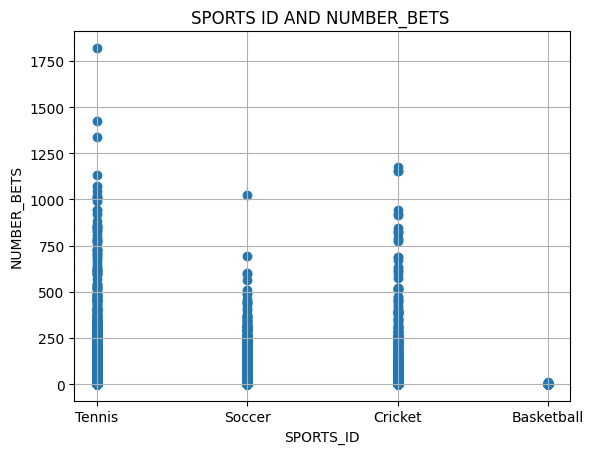

In [4]:
# PLOT 2 SPORTS ID AND NUMBER_BETS
plt.scatter(matchodds_df["SPORTS_ID"], matchodds_df["NUMBER_BETS"])
plt.xlabel('SPORTS_ID')
plt.ylabel('NUMBER_BETS')
plt.grid(True)
plt.title('SPORTS ID AND NUMBER_BETS ')
plt.show()

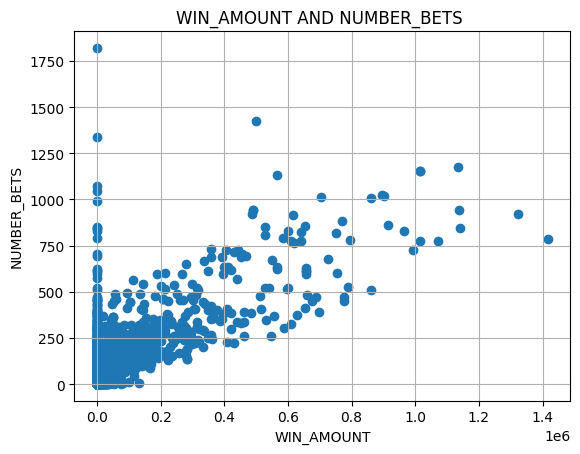

In [5]:
# PLOT 3 WIN AMOUNT AND NUMBER_BETS
plt.scatter(matchodds_df["WIN_AMOUNT"], matchodds_df["NUMBER_BETS"])
plt.xlabel('WIN_AMOUNT')
plt.ylabel('NUMBER_BETS')
plt.grid(True)
plt.title('WIN_AMOUNT AND NUMBER_BETS ')
plt.show()

In [6]:
tennis_df = matchodds_df[matchodds_df["SPORTS_ID"].str.contains("Tennis")]
tennis_df = pd.DataFrame(tennis_df)
tennis_df

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Tennis,115288925,4/9/14 11:50,Group A/Brasov Challenger 2014/Second Round Ma...,4/9/14 10:30,Match Odds,4/9/14 10:34,7659748,Aslan Karatsev,1.12,...,1,IP,4297.1040,0.000,Romania,Brasov,45.652510,25.610565,22.1,0
4,Tennis,115360639,7/9/14 17:52,Group A/Coupe Banque Nationale 2014/Qualifying...,7/9/14 16:05,Match Odds,7/9/14 16:09,4030151,Heidi El Tabakh,1.70,...,0,IP,0.0000,3511.826,Canada,Quebec City,46.813743,-71.208406,18.6,0
6,Tennis,115277381,4/9/14 10:14,Group A/Brasov Challenger 2014/Second Round Ma...,4/9/14 8:47,Match Odds,4/9/14 8:42,3914801,Guillaume Rufin,2.44,...,1,IP,641.7688,0.000,Romania,Brasov,45.652510,25.610565,20.4,0
12,Tennis,115252631,1/9/14 21:04,Group A/US Open 2014/Womens Tournament/Fourth ...,1/9/14 18:30,Match Odds,1/9/14 19:18,2453959,Ekaterina Makarova,1.32,...,1,IP,421596.8856,0.000,USA,"Queens, NY",40.713508,-73.828313,29.1,0
13,Tennis,115280554,4/9/14 20:48,Group A/US Open 2014/Mens Tournament/Quarter F...,4/9/14 17:30,Match Odds,4/9/14 18:32,2004441,Berdych,1.85,...,0,IP,0.0000,1100.343,USA,"Queens, NY",40.713508,-73.828313,27.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57293,Tennis,115325933,5/9/14 21:48,Group A/Medellin Challenger 2014/Quarter Final...,5/9/14 20:08,Match Odds,5/9/14 20:11,4490590,Joao Souza,1.25,...,1,IP,18672.7500,0.000,Colombia,Medellin,6.243352,-75.575201,25.7,0
57297,Tennis,115252468,1/9/14 18:56,Group A/US Open 2014/Mens Tournament/Fourth Ro...,1/9/14 16:30,Match Odds,1/9/14 16:52,2249229,Novak Djokovic,1.08,...,1,PE,4887.4320,0.000,USA,"Queens, NY",40.713508,-73.828313,28.3,0
57308,Tennis,115252667,2/9/14 0:36,Group A/US Open 2014/Mens Tournament/Fourth Ro...,1/9/14 20:00,Match Odds,1/9/14 21:33,2257309,Stanislas Wawrinka,1.08,...,1,IP,283626.0684,0.000,USA,"Queens, NY",40.713508,-73.828313,28.4,0
57310,Tennis,115252045,2/9/14 6:27,Group A/US Open 2014/Mens Tournament/Fourth Ro...,2/9/14 0:30,Match Odds,2/9/14 2:06,2483001,Kei Nishikori,3.85,...,1,IP,8643.9430,0.000,USA,"Queens, NY",40.713508,-73.828313,24.6,0


In [7]:
highodds_tennis_df = tennis_df[tennis_df['ODDS'] >= 3.3]
highodds_tennis_df

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
14,Tennis,115351910,6/9/14 21:56,Group A/Coupe Banque Nationale 2014/Qualifying...,6/9/14 19:27,Match Odds,6/9/14 19:26,6564416,Tori Kinard,3.35,...,0,PE,0.000,3.2160,Canada,Quebec City,46.813743,-71.208406,18.6,0
32,Tennis,115252415,1/9/14 21:06,Group A/US Open 2014/Mens Tournament/Fourth Ro...,1/9/14 18:00,Match Odds,1/9/14 18:30,4190307,Jo-Wilfried Tsonga,4.70,...,0,IP,0.000,51994.6900,USA,"Queens, NY",40.713508,-73.828313,29.1,0
42,Tennis,115252231,1/9/14 21:13,Group A/US Open 2014/Womens Tournament/Doubles...,1/9/14 19:30,Match Odds,1/9/14 20:21,8189271,Gajdosova/Tomljanovic,5.30,...,0,IP,0.000,704.5820,USA,"Queens, NY",40.713508,-73.828313,29.1,0
55,Tennis,115354572,7/9/14 9:28,Group A/Tashkent Open 2014/Qualifying Matches/...,7/9/14 7:25,Match Odds,7/9/14 7:26,7593284,Risa Ozaki,8.40,...,0,IP,0.000,1008.0000,Uzbekistan,Tashkent,41.312336,69.278708,29.3,0
69,Tennis,115343187,6/9/14 12:44,Group A/Brasov Challenger 2014/Semi Final Matc...,6/9/14 11:04,Match Odds,6/9/14 11:06,3126145,Jaroslav Pospisil,3.70,...,0,IP,0.000,2062.6760,Romania,Brasov,45.652510,25.610565,21.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57256,Tennis,115243996,1/9/14 2:59,Group A/US Open 2014/Womens Tournament/Fourth ...,31-08-2014 23:00,Match Odds,1/9/14 0:56,6390244,Belinda Bencic,3.40,...,1,IP,1022.006,0.0000,USA,"Queens, NY",40.713508,-73.828313,23.6,1
57271,Tennis,115252171,1/9/14 16:31,Group A/US Open 2014/Womens Tournament/Fourth ...,1/9/14 15:00,Match Odds,1/9/14 15:10,2256494,Casey Dellacqua,3.65,...,0,PE,0.000,11276.0545,USA,"Queens, NY",40.713508,-73.828313,27.4,0
57278,Tennis,115286560,4/9/14 10:48,Group A/Brasov Challenger 2014/Second Round Ma...,4/9/14 8:47,Match Odds,4/9/14 8:42,8461638,Yannik Reuter,26.00,...,0,IP,0.000,1948.9600,Romania,Brasov,45.652510,25.610565,21.4,0
57292,Tennis,115252381,1/9/14 18:01,Group A/US Open 2014/Womens Tournament/Fourth ...,1/9/14 16:30,Match Odds,1/9/14 16:56,2250864,Kaia Kanepi,60.00,...,0,IP,0.000,47780.4000,USA,"Queens, NY",40.713508,-73.828313,27.9,0


In [8]:
mean = highodds_tennis_df['ODDS'].mean()
median = highodds_tennis_df['ODDS'].median()
std_dev = highodds_tennis_df['ODDS'].std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")

Mean: 30.146738286305983
Median: 6.6
Standard Deviation: 98.01880881830857


In [9]:
queens_bets_df = highodds_tennis_df[highodds_tennis_df["CITY"].str.contains("Queens, NY")]
queens_bets_df = pd.DataFrame(queens_bets_df)
queens_bets_df
                            


,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
32,Tennis,115252415,1/9/14 21:06,Group A/US Open 2014/Mens Tournament/Fourth Ro...,1/9/14 18:00,Match Odds,1/9/14 18:30,4190307,Jo-Wilfried Tsonga,4.70,...,0,IP,0.000,51994.6900,USA,"Queens, NY",40.713508,-73.828313,29.1,0
42,Tennis,115252231,1/9/14 21:13,Group A/US Open 2014/Womens Tournament/Doubles...,1/9/14 19:30,Match Odds,1/9/14 20:21,8189271,Gajdosova/Tomljanovic,5.30,...,0,IP,0.000,704.5820,USA,"Queens, NY",40.713508,-73.828313,29.1,0
132,Tennis,115296319,5/9/14 21:41,Group A/US Open 2014/Womens Tournament/Semi Fi...,5/9/14 19:45,Match Odds,5/9/14 20:40,2453959,Ekaterina Makarova,700.00,...,0,IP,0.000,6412.0000,USA,"Queens, NY",40.713508,-73.828313,27.3,0
143,Tennis,115252193,2/9/14 1:40,Group A/US Open 2014/Womens Tournament/Fourth ...,1/9/14 23:00,Match Odds,1/9/14 23:21,5300820,Aleksandra Krunic,4.00,...,0,IP,0.000,3824.4800,USA,"Queens, NY",40.713508,-73.828313,25.3,0
157,Tennis,115257362,3/9/14 1:18,Group A/US Open 2014/Mens Tournament/Fourth Ro...,2/9/14 23:00,Match Odds,2/9/14 23:20,4290403,Roberto Bautista Agut,13.50,...,0,PE,0.000,11971.8000,USA,"Queens, NY",40.713508,-73.828313,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57228,Tennis,115271844,4/9/14 5:18,Group A/US Open 2014/Mens Tournament/Quarter F...,4/9/14 0:30,Match Odds,4/9/14 1:43,2256509,Andy Murray,6.60,...,0,IP,0.000,125365.2840,USA,"Queens, NY",40.713508,-73.828313,23.1,0
57256,Tennis,115243996,1/9/14 2:59,Group A/US Open 2014/Womens Tournament/Fourth ...,31-08-2014 23:00,Match Odds,1/9/14 0:56,6390244,Belinda Bencic,3.40,...,1,IP,1022.006,0.0000,USA,"Queens, NY",40.713508,-73.828313,23.6,1
57271,Tennis,115252171,1/9/14 16:31,Group A/US Open 2014/Womens Tournament/Fourth ...,1/9/14 15:00,Match Odds,1/9/14 15:10,2256494,Casey Dellacqua,3.65,...,0,PE,0.000,11276.0545,USA,"Queens, NY",40.713508,-73.828313,27.4,0
57292,Tennis,115252381,1/9/14 18:01,Group A/US Open 2014/Womens Tournament/Fourth ...,1/9/14 16:30,Match Odds,1/9/14 16:56,2250864,Kaia Kanepi,60.00,...,0,IP,0.000,47780.4000,USA,"Queens, NY",40.713508,-73.828313,27.9,0


In [10]:
#  I NEEDED TO NARROW DOWN THE FILE SO I PICKED LOCATION AND 1 SPORT.
#THE BELOW DATAFRAME AND PLOT IS BASED ON PLAYERS WHO GOT BET ON MULTIPLE TIMES PER EVENT AND WON AT LEAST ONCE IN THE NY OPEN TOURNAMENT
win_flag_df = queens_bets_df[queens_bets_df['WIN_FLAG'] == 1]
win_flag_df

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
477,Tennis,115252045,2/9/14 6:27,Group A/US Open 2014/Mens Tournament/Fourth Ro...,2/9/14 0:30,Match Odds,2/9/14 2:06,2483001,Kei Nishikori,5.00,...,1,IP,74.600,0.0,USA,"Queens, NY",40.713508,-73.828313,24.6,0
926,Tennis,115296359,6/9/14 19:06,Group A/US Open 2014/Mens Tournament/Semi Fina...,6/9/14 16:00,Match Odds,6/9/14 16:13,2483001,Kei Nishikori,9.60,...,1,IP,118419.264,0.0,USA,"Queens, NY",40.713508,-73.828313,30.3,0
1051,Tennis,115272009,3/9/14 23:29,Group A/US Open 2014/Mens Tournament/Quarter F...,3/9/14 19:00,Match Odds,3/9/14 19:13,2483001,Kei Nishikori,4.90,...,1,IP,5868.240,0.0,USA,"Queens, NY",40.713508,-73.828313,28.2,0
1425,Tennis,115272009,3/9/14 23:29,Group A/US Open 2014/Mens Tournament/Quarter F...,3/9/14 19:00,Match Odds,3/9/14 19:13,2483001,Kei Nishikori,6.00,...,1,IP,1652.640,0.0,USA,"Queens, NY",40.713508,-73.828313,28.2,0
2013,Tennis,115325789,7/9/14 0:44,Group A/US Open 2014/Womens Tournament/Doubles...,6/9/14 19:00,Match Odds,6/9/14 22:38,6369481,Makarova/Vesnina,4.30,...,1,IP,1421.838,0.0,USA,"Queens, NY",40.713508,-73.828313,26.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55009,Tennis,115325789,7/9/14 0:44,Group A/US Open 2014/Womens Tournament/Doubles...,6/9/14 19:00,Match Odds,6/9/14 22:38,6369481,Makarova/Vesnina,11.00,...,1,IP,6552.260,0.0,USA,"Queens, NY",40.713508,-73.828313,26.3,0
56142,Tennis,115249875,1/9/14 19:51,Group A/US Open 2014/Womens Tournament/Doubles...,1/9/14 18:00,Match Odds,1/9/14 18:27,8357669,Date-Krumm/Zahlavova Strycova,3.40,...,1,PE,14.688,0.0,USA,"Queens, NY",40.713508,-73.828313,28.8,0
57147,Tennis,115325978,7/9/14 9:38,Group A/US Open 2014/Mens Tournament/Semi Fina...,6/9/14 17:30,Match Odds,6/9/14 20:24,8176508,Ma Cilic,4.20,...,1,IP,800.688,0.0,USA,"Queens, NY",40.713508,-73.828313,31.8,0
57256,Tennis,115243996,1/9/14 2:59,Group A/US Open 2014/Womens Tournament/Fourth ...,31-08-2014 23:00,Match Odds,1/9/14 0:56,6390244,Belinda Bencic,3.40,...,1,IP,1022.006,0.0,USA,"Queens, NY",40.713508,-73.828313,23.6,1


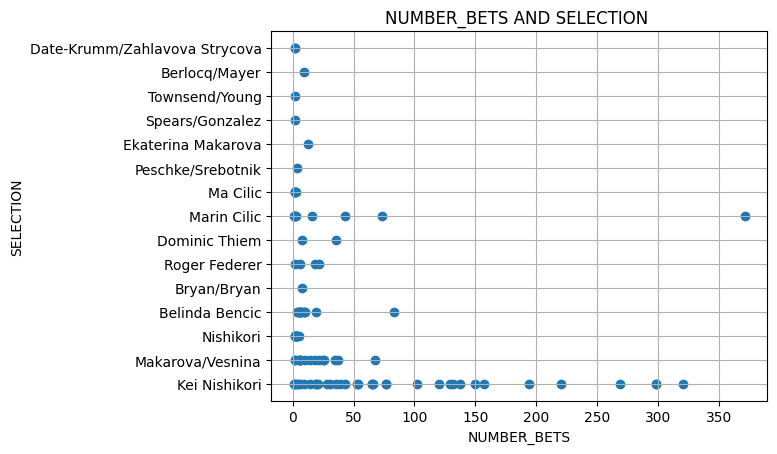

In [11]:
plt.scatter(win_flag_df["NUMBER_BETS"], win_flag_df["SELECTION"])
plt.xlabel('NUMBER_BETS')
plt.ylabel('SELECTION')
plt.grid(True)
plt.title('NUMBER_BETS AND SELECTION ')
plt.show()

In [12]:
# WITHIN THESE PLAYERS WHO GOT BET ON ,THE DATAFRAME AND PLOT BELOW IS BASE ON "ONE BET ONE WIN". ALSO THEY ARE ABOVE 3.3 WHICH IS OUR UNDERDOG ODDS MARK.
one_bet_one_win = win_flag_df[win_flag_df['NUMBER_BETS'] == 1]
one_bet_one_win

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
17215,Tennis,115325952,6/9/14 22:10,Group A/US Open 2014/Mens Tournament/Semi Fina...,6/9/14 17:30,Match Odds,6/9/14 20:24,2263681,Marin Cilic,3.8,...,1,PE,430.008,0.0,USA,"Queens, NY",40.713508,-73.828313,31.8,0
51000,Tennis,115296359,6/9/14 19:06,Group A/US Open 2014/Mens Tournament/Semi Fina...,6/9/14 16:00,Match Odds,6/9/14 16:13,2483001,Kei Nishikori,5.8,...,1,PE,6.206,0.0,USA,"Queens, NY",40.713508,-73.828313,30.3,0


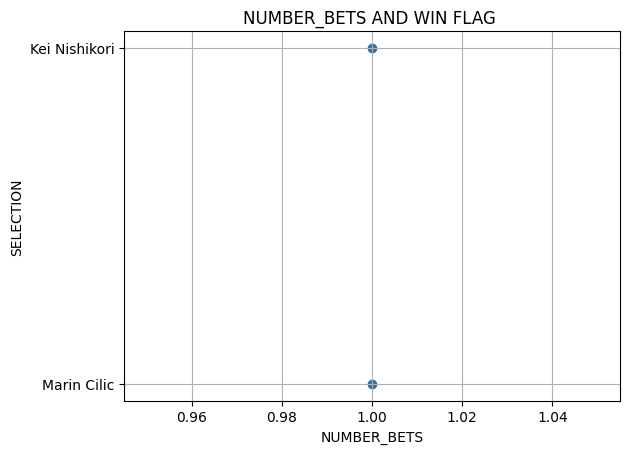

In [13]:
plt.scatter(one_bet_one_win["NUMBER_BETS"], one_bet_one_win["SELECTION"])
plt.xlabel('NUMBER_BETS')
plt.ylabel('SELECTION')
plt.grid(True)
plt.title('NUMBER_BETS AND WIN FLAG ')
plt.show()

In [14]:
#MAP OF THE ONE BET ONE WIN
map = folium.Map(location=[40.713508, -73.828313], zoom_start=12)
marker = folium.Marker(location=[40.713508, -73.828313], popup='Queens, NY')
marker.add_to(map)
folium.LayerControl().add_to(map)

# Save the map to an HTML file
map.save('map.html')
map


In [15]:
one_bet_one_win.describe()

,EVENT_ID,SELECTION_ID,ODDS,NUMBER_BETS,VOLUME_MATCHED,WIN_FLAG,WIN_AMOUNT,LOSS_AMOUNT,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
count,2.000000e+00,2.000000e+00,2.000000,2.0,2.000000,2.0,2.000000,2.0,2.000000,2.000000,2.00000,2.0
mean,1.153112e+08,2.373341e+06,4.800000,1.0,57.115000,1.0,218.107000,0.0,40.713508,-73.828313,31.05000,0.0
std,2.092541e+04,1.550827e+05,1.414214,0.0,79.259599,0.0,299.673268,0.0,0.000000,0.000000,1.06066,0.0
min,1.152964e+08,2.263681e+06,3.800000,1.0,1.070000,1.0,6.206000,0.0,40.713508,-73.828313,30.30000,0.0
25%,1.153038e+08,2.318511e+06,4.300000,1.0,29.092500,1.0,112.156500,0.0,40.713508,-73.828313,30.67500,0.0
50%,1.153112e+08,2.373341e+06,4.800000,1.0,57.115000,1.0,218.107000,0.0,40.713508,-73.828313,31.05000,0.0
75%,1.153186e+08,2.428171e+06,5.300000,1.0,85.137500,1.0,324.057500,0.0,40.713508,-73.828313,31.42500,0.0
max,1.153260e+08,2.483001e+06,5.800000,1.0,113.160000,1.0,430.008000,0.0,40.713508,-73.828313,31.80000,0.0
